In [ ]:

# 10/30/24


In [ ]:

# I will analyze store sale data. I will try to predict sales for each product.


In [ ]:

# I don't end up doing that here very well. I just do it on a small subset of the data.
# And i do it very basically, using time dummy and lag features (just lag_1)


In [12]:

import pandas as pd

import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas import DataFrame, Series

import numpy as np

from sklearn.linear_model import LinearRegression


In [29]:

# what does test data look like?

df_test = pd.read_csv('test.csv')

df_test

# Okay, so test data is for 2 weeks out from end of training data.


,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [63]:

df = pd.read_csv('train.csv')


In [64]:

df


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [65]:
# 3,000,888 rows in total
# dates from 2013 to 2017
# store numbers from 1 to 54
# 33 unique family values
# max sales = 124717. min sales = 0. 939130 of those are 0.

# what are the different family values in df?
df['family'].unique()

# only stores 25 and 36 were open on New Year's (36 only in 2014)




array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [66]:

# let me see the dtypes

# date is object. I will convert it to datetime
# df['date'] = pd.to_datetime(df['date'])

df.dtypes


id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

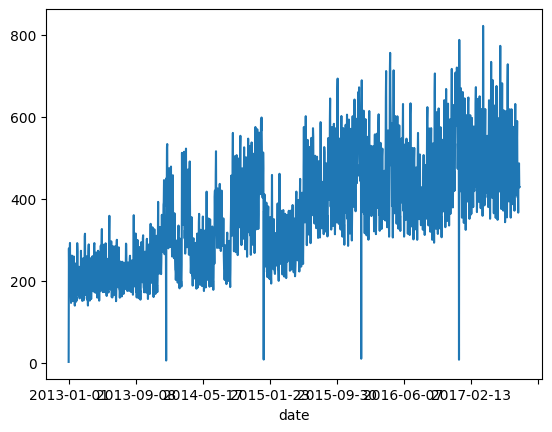

In [67]:

# this graph will be dumb. let me make a graph of average sales by date.
# So group by date and take the average of sales.

df.groupby('date')['sales'].mean().plot()
plt.show()



In [68]:

# let me start small. I don't know if I will tackle this whole dataset ever, but let me at least
# get something going by trying a subset of the data.
# I'll look at sales for just family 1, which will be HARDWARE.
#  I want to group total sales across all store_nbr's. I will group by date and sum sales.

df_hardware = df[df['family'] == 'HARDWARE']
df_hardware_sales = df_hardware.groupby('date')['sales'].sum()
df_hardware_sales = df_hardware_sales.reset_index()
df_hardware_sales



,date,sales
0,2013-01-01,0.0
1,2013-01-02,46.0
2,2013-01-03,37.0
3,2013-01-04,57.0
4,2013-01-05,87.0
...,...,...
1679,2017-08-11,83.0
1680,2017-08-12,89.0
1681,2017-08-13,108.0
1682,2017-08-14,66.0


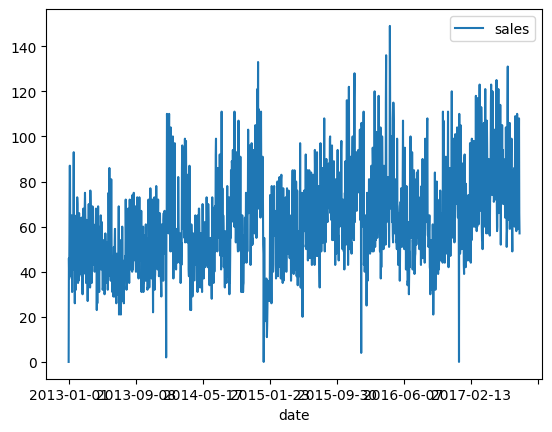

In [69]:

# I will plot this data
df_hardware_sales.plot(x='date', y='sales')
plt.show()


In [71]:

# let me do the simplest time-step features; time dummy and lag features.
# I will make a time dummy feature that will go up by one for each day.
# I will make a lag feature that will be the sales from the previous day.

df_hardware_sales['time'] = range(1, len(df_hardware_sales) + 1)
df_hardware_sales['lag_sales'] = df_hardware_sales['sales'].shift(1)

df_hardware_sales

# I will drop the first row because it has a NaN value.
df_hardware_sales = df_hardware_sales.dropna()

df_hardware_sales



,date,sales,time,lag_sales
1,2013-01-02,46.0,2,0.0
2,2013-01-03,37.0,3,46.0
3,2013-01-04,57.0,4,37.0
4,2013-01-05,87.0,5,57.0
5,2013-01-06,87.0,6,87.0
...,...,...,...,...
1679,2017-08-11,83.0,1680,59.0
1680,2017-08-12,89.0,1681,83.0
1681,2017-08-13,108.0,1682,89.0
1682,2017-08-14,66.0,1683,108.0


In [72]:


# let me split this data now into training and testing data.
# I will use the dates from July 31st, 2017 and before as training data. 
# I will use the dates from August 1st, 2017 and after as testing data.

df_hardware_sales_train = df_hardware_sales[df_hardware_sales['date'] <= '2017-07-31']
df_hardware_sales_test = df_hardware_sales[df_hardware_sales['date'] > '2017-07-31']


In [73]:

# I will make a linear regression model now.
# I will use the time dummy and lag features to predict sales.

X_train = df_hardware_sales_train[['time', 'lag_sales']]
y_train = df_hardware_sales_train['sales']

model = LinearRegression()
model.fit(X_train, y_train)

# And i will show the model equation
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)
print('Model: \n', 'y = ', model.intercept_, ' + ', model.coef_[0], 'x1 + ', model.coef_[1], 'x2')



Intercept: 
 27.70297053282939
Coefficients: 
 [0.01013208 0.41059541]
Model: 
 y =  27.70297053282939  +  0.010132076723612835 x1 +  0.4105954057029056 x2


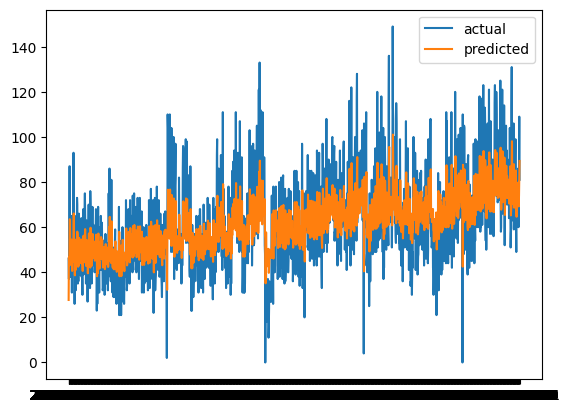

In [74]:

# let me show the model's predictions on the train data.
y_train_pred = model.predict(X_train)

plt.plot(df_hardware_sales_train['date'], y_train, label='actual')
plt.plot(df_hardware_sales_train['date'], y_train_pred, label='predicted')
plt.legend()
plt.show()


/var/folders/bn/hy61x8_j5ng1fg7vpk14wkq00000gn/T/ipykernel_15084/1755856455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hardware_sales_test['time'] = range(1, len(df_hardware_sales_test) + 1)
/var/folders/bn/hy61x8_j5ng1fg7vpk14wkq00000gn/T/ipykernel_15084/1755856455.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hardware_sales_test['lag_sales'] = df_hardware_sales_test['sales'].shift(1)


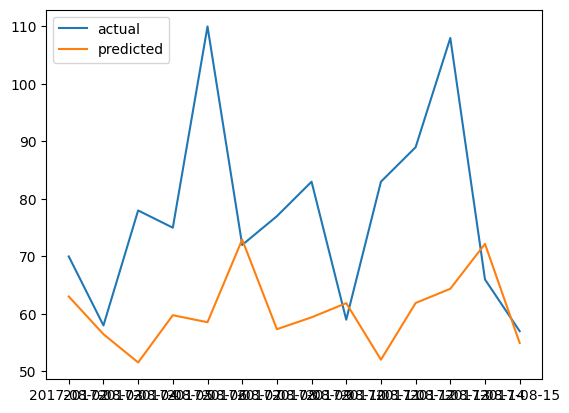

In [75]:

# let me show the model's predictions on the test data.
# I will need to make the same time dummy and lag features for the test data.

df_hardware_sales_test['time'] = range(1, len(df_hardware_sales_test) + 1)
df_hardware_sales_test['lag_sales'] = df_hardware_sales_test['sales'].shift(1)

df_hardware_sales_test = df_hardware_sales_test.dropna()

X_test = df_hardware_sales_test[['time', 'lag_sales']]
y_test = df_hardware_sales_test['sales']

y_test_pred = model.predict(X_test)

plt.plot(df_hardware_sales_test['date'], y_test, label='actual')
plt.plot(df_hardware_sales_test['date'], y_test_pred, label='predicted')
plt.legend()
plt.show()


In [76]:

# and let me show the rmse of the model on the test data.
rmse = np.sqrt(np.mean((y_test - y_test_pred)**2))
rmse


24.228048160716604